In [ ]:
import numpy as np
import PIL.Image
from PIL import Image

import torch, torchvision
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader , Subset
import torch.nn as nn
import torch.optim as optim
import time
from matplotlib import pyplot as plt

c:\Users\joaosimoes\anaconda3\envs\Yolo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
imagem_size = 100

transformadores_imagem =  transforms.Compose([transforms.Resize(size=[imagem_size,imagem_size]),transforms.ToTensor()]) # Configurando o tranformador para o tamnaha da matriz suportado pela alexnet 100x100 e conveter para um tensor

In [ ]:
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transformadores_imagem)  # Carrega as imagens de treino do dataset
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transformadores_imagem)  # Carrega as imagens validação do dataset

train_subset = Subset(trainset, range(20000)) #Selecionando 20 mil imagens do trianset
val_subset = Subset(valset, range(1000)) #Selecionando mil do valset

trainloader = DataLoader(train_subset, batch_size=130, shuffle=True)
valloader = DataLoader(val_subset, batch_size=130, shuffle=True)

In [5]:
indice_para_classe = {v: k for k, v in trainset.class_to_idx.items()}
numero_de_classes = len(indice_para_classe)
class_names = [str(i) for i in range(10)]

O numero: 9


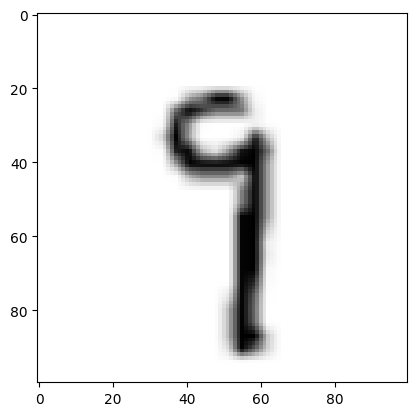

In [6]:
dataiter = iter(trainloader)

imagens, etiquetas = next(dataiter)


Imagem_teste = plt.imshow(imagens[0].numpy().squeeze(), cmap='Greys')
print('O numero: {}'.format(etiquetas[0].numpy()))

In [7]:
imagens[0].shape

torch.Size([1, 100, 100])

In [8]:
from collections import Counter

labels_train = [label for _, label in train_subset]
contagem_train = Counter(labels_train)
print("Distribuição - Treino:")
for label, count in sorted(contagem_train.items()):
    print(f"Classe {label}: {count:5d} imagens")

Distribuição - Treino:
Classe 0:  1994 imagens
Classe 1:  2281 imagens
Classe 2:  1929 imagens
Classe 3:  2076 imagens
Classe 4:  1945 imagens
Classe 5:  1775 imagens
Classe 6:  1971 imagens
Classe 7:  2093 imagens
Classe 8:  1922 imagens
Classe 9:  2014 imagens


In [10]:
alexnet =  models.alexnet(pretrained =False)

alexnet

c:\Users\joaosimoes\anaconda3\envs\Yolo\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\joaosimoes\anaconda3\envs\Yolo\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
alexnet.classifier[6] = nn.Linear(4096, numero_de_classes)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim=1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
funcao_erro = nn.NLLLoss()

otimizador = optim.Adam(alexnet.parameters(), lr=0.001, weight_decay=0.0000) 
otimizador

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0.0
)

In [13]:
def treinar_modelo (modelo,metrica_erro, otimizador_sgd):
    erro_treino , acuracia_treino = 0.0 , 0.0
    modelo.train()
    hist_acuracia = []
    hist_erro = []

    for i, (entradas, labels) in enumerate(trainloader):

        entradas = entradas.to(device)
        labels = labels.to(device)

        otimizador_sgd.zero_grad()
        saidas = modelo(entradas)
        erro = metrica_erro(saidas, labels)

        erro.backward()

        otimizador_sgd.step()
        erro_treino += erro.item() * entradas.size(0)

        valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
        predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))

  
        acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))


        acuracia_treino += acuracia.item() * entradas.size(0)

        hist_acuracia.append(acuracia.item())
        hist_erro.append(erro.item())


        print("Treino - Lote número {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(i, erro.item(), acuracia.item()))

    return erro_treino, acuracia_treino, hist_acuracia, hist_erro
    

In [14]:
def validar_modelo(modelo,metrica_erro):
    erro_validacao, acuracia_validacao = 0.0 , 0.0
    hist_acuracia = []
    hist_erro = []

    with torch.no_grad():
            
            modelo.eval()

            for j, (entradas, labels) in enumerate(valloader):
                entradas = entradas.to(device)
                labels = labels.to(device)

                saidas = modelo(entradas)


                erro = metrica_erro(saidas, labels)

                erro_validacao += erro.item() * entradas.size(0)

                valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
                predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))

                acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))

                acuracia_validacao += acuracia.item() * entradas.size(0)

                hist_acuracia.append(acuracia.item())
                hist_erro.append(erro.item())

                print("Validação - Lote número: {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(j, erro.item(), acuracia.item()))



    return acuracia_validacao , erro_validacao , hist_acuracia, hist_erro
 

In [15]:
def treinar_e_validar(modelo, metrica_erro, otimizador_sgd, epocas=10):


    treino = [[],[]]
    validacao = [[],[]]
    historico = []

    for epoca in range(epocas):
        inicio_epoca = time.time()
        print("\n\nÉpoca: {}/{}".format(epoca+1, epocas))

        erro_treino, acuracia_treino, hist_acuracia_treino , hist_erro_treino = treinar_modelo (modelo,metrica_erro, otimizador_sgd)
        acuracia_validacao, erro_validacao , hist_acuracia_val , hist_erro_val = validar_modelo(modelo,metrica_erro)


        erro_medio_treino = erro_treino/len(train_subset)
        acuracia_media_treino = acuracia_treino/len(train_subset)


        erro_medio_validacao = erro_validacao/len(val_subset)
        acuracia_media_validacao = acuracia_validacao/len(val_subset)

        historico.append([erro_medio_treino, erro_medio_validacao, acuracia_media_treino, acuracia_media_validacao])
        treino[0].extend(hist_acuracia_treino)
        treino[1].extend(hist_erro_treino)
        validacao[0].extend(hist_acuracia_val)
        validacao[1].extend(hist_erro_val)

        fim_epoca = time.time()

        print("Época : {:03d}, Treino: Erro: {:.4f}, Acurácia: {:.4f}%, \n\t\tValidação : Erro : {:.4f}, Acurácia: {:.4f}%, Tempo: {:.4f}s".format(epoca+1, erro_medio_treino, acuracia_media_treino*100, erro_medio_validacao, acuracia_media_validacao*100, fim_epoca-inicio_epoca))

    return historico, treino, validacao

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'{device}\n')

numero_de_epocas = 4

cpu



In [17]:
historico, treino, validacao = treinar_e_validar(alexnet, funcao_erro, otimizador, numero_de_epocas)



Época: 1/4
Treino - Lote número 000, Erro: 2.3021, Acurácia: 0.1154
Treino - Lote número 001, Erro: 4.0613, Acurácia: 0.1231
Treino - Lote número 002, Erro: 2.3014, Acurácia: 0.0923
Treino - Lote número 003, Erro: 2.3423, Acurácia: 0.1000
Treino - Lote número 004, Erro: 2.3025, Acurácia: 0.1077
Treino - Lote número 005, Erro: 2.2973, Acurácia: 0.1385
Treino - Lote número 006, Erro: 2.3135, Acurácia: 0.1077
Treino - Lote número 007, Erro: 2.3071, Acurácia: 0.0462
Treino - Lote número 008, Erro: 2.3000, Acurácia: 0.1692
Treino - Lote número 009, Erro: 2.2985, Acurácia: 0.1538
Treino - Lote número 010, Erro: 2.2985, Acurácia: 0.1154
Treino - Lote número 011, Erro: 2.2991, Acurácia: 0.1000
Treino - Lote número 012, Erro: 2.3128, Acurácia: 0.0846
Treino - Lote número 013, Erro: 2.2985, Acurácia: 0.1077
Treino - Lote número 014, Erro: 2.3019, Acurácia: 0.1385
Treino - Lote número 015, Erro: 2.2970, Acurácia: 0.2000
Treino - Lote número 016, Erro: 2.2910, Acurácia: 0.1154
Treino - Lote núme

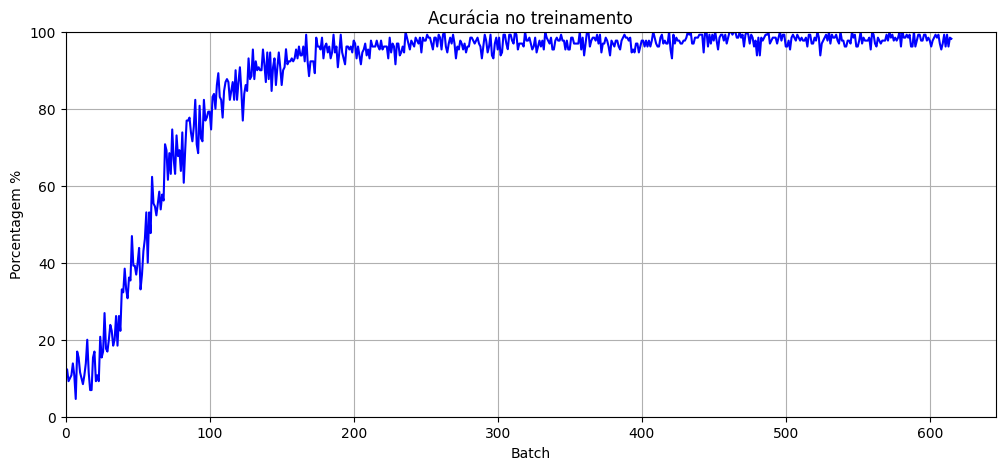

In [67]:
valores = [i*100 for i in treino[0]]

plt.figure(figsize=(12, 5))

plt.plot(valores, linestyle='-', color='b')

plt.title('Acurácia no treinamento')
plt.xlabel('Batch')
plt.ylabel('Porcentagem %')
plt.ylim(0, 100)
plt.xlim(left=0) 
   


plt.grid(True)
plt.show()



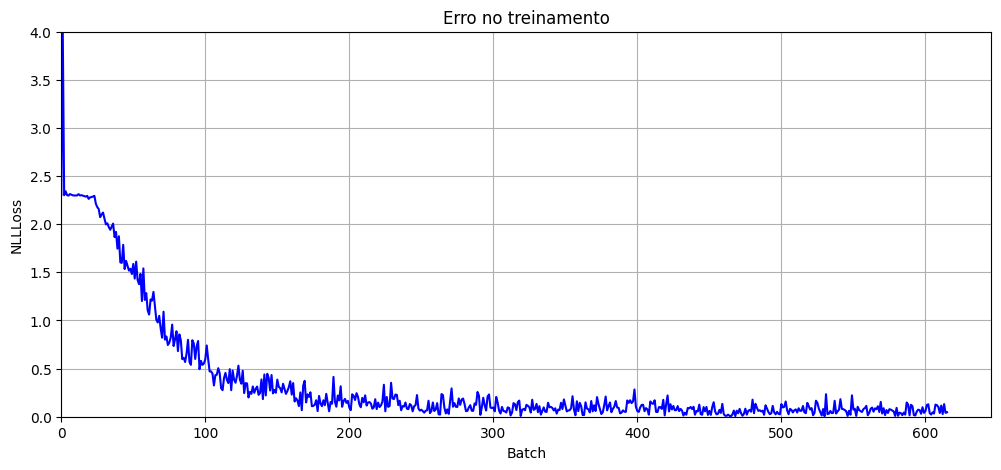

In [63]:
valores = [i for i in treino[1]]

plt.figure(figsize=(12, 5))

plt.plot(valores, linestyle='-', color='b')

plt.title('Erro no treinamento')
plt.xlabel('Batch')
plt.ylabel('NLLLoss')
plt.xlim(left=0)
plt.ylim(0, 4,5)


plt.grid(True)
plt.show()

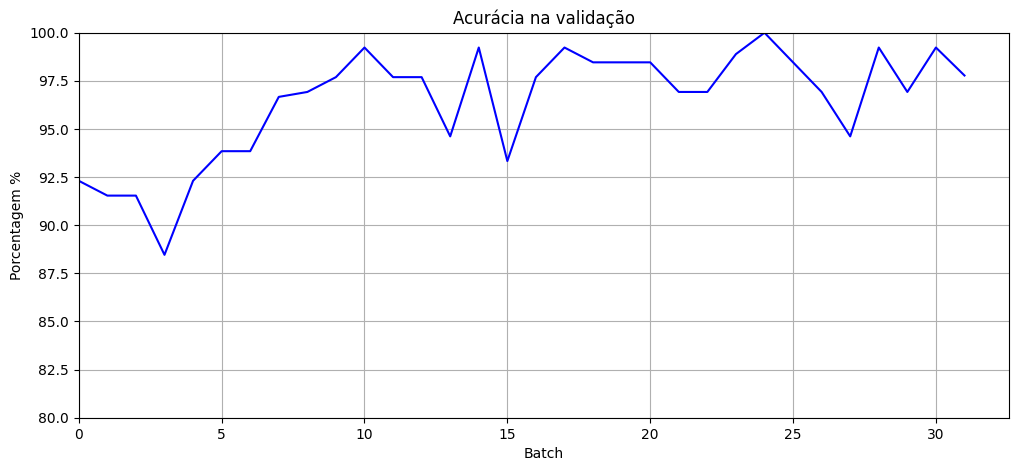

In [66]:
valores = [i*100 for i in validacao[0]]

plt.figure(figsize=(12, 5))

plt.plot(valores, linestyle='-', color='b')

plt.title('Acurácia na validação')
plt.xlabel('Batch')
plt.ylabel('Porcentagem %')
plt.ylim(80, 100)
plt.xlim(left=0)    

plt.grid(True)
plt.show()

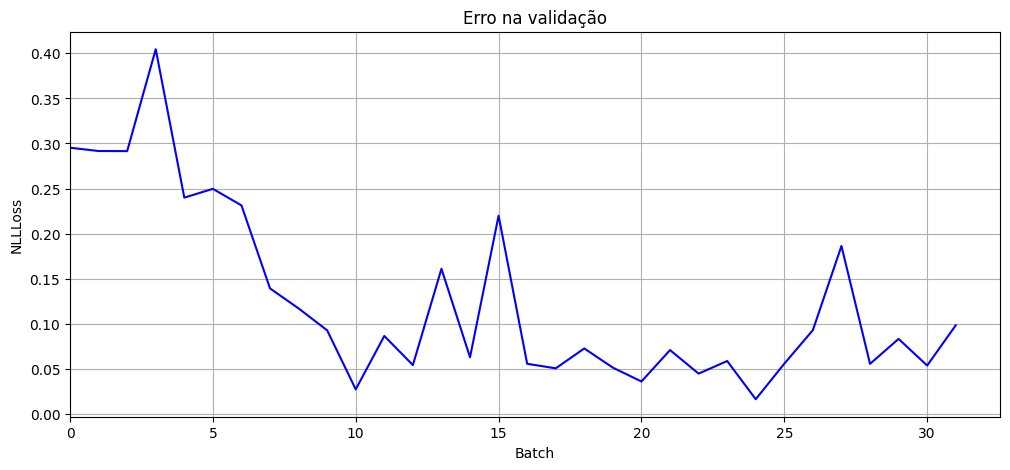

In [65]:
valores = [i for i in validacao[1]]

plt.figure(figsize=(12, 5))

plt.plot(valores, linestyle='-', color='b')

plt.title('Erro na validação')
plt.xlabel('Batch')
plt.ylabel('NLLLoss')
plt.xlim(left=0)    

plt.grid(True)
plt.show()

In [ ]:
todas_labels = []
todas_predicoes = []


with torch.no_grad():
    alexnet.eval()

    for entradas, labels in valloader:

        saidas = alexnet(entradas)

        # Pegar as previsões (índices das classes previstas)
        _, predicoes = torch.max(saidas.data, 1)

        
        todas_labels.append(labels)
        todas_predicoes.append(predicoes)

todas_labels = torch.cat(todas_labels, dim=0)
todas_predicoes = torch.cat(todas_predicoes, dim=0)

len(todas_predicoes)

1000

In [36]:
todas_labels

tensor([8, 4, 2, 1, 4, 7, 4, 4, 7, 0, 7, 6, 8, 6, 1, 3, 2, 0, 0, 5, 3, 1, 5, 8,
        1, 9, 2, 2, 0, 0, 2, 4, 7, 5, 4, 8, 7, 8, 0, 2, 2, 2, 2, 6, 9, 9, 2, 1,
        4, 4, 1, 5, 4, 1, 3, 7, 3, 7, 6, 4, 4, 9, 9, 7, 1, 2, 4, 2, 6, 4, 4, 1,
        1, 5, 4, 3, 1, 3, 0, 4, 0, 4, 4, 7, 9, 2, 2, 6, 5, 4, 8, 4, 3, 5, 3, 4,
        1, 5, 9, 3, 9, 1, 2, 2, 0, 1, 4, 5, 9, 5, 2, 1, 3, 1, 8, 0, 4, 1, 2, 0,
        9, 6, 9, 5, 9, 1, 1, 8, 9, 1, 3, 3, 2, 2, 8, 8, 5, 8, 1, 2, 7, 7, 3, 4,
        1, 1, 4, 5, 4, 5, 5, 7, 1, 2, 5, 2, 3, 8, 0, 0, 1, 5, 5, 5, 1, 8, 3, 7,
        8, 1, 3, 4, 4, 3, 8, 7, 7, 5, 5, 6, 1, 6, 2, 1, 5, 5, 1, 6, 1, 8, 9, 7,
        4, 3, 3, 8, 0, 6, 3, 9, 0, 7, 3, 3, 9, 5, 1, 1, 1, 2, 1, 0, 3, 0, 3, 2,
        8, 5, 1, 1, 2, 3, 6, 1, 9, 7, 0, 5, 9, 7, 8, 1, 3, 3, 3, 0, 7, 7, 4, 9,
        3, 2, 5, 0, 1, 4, 9, 7, 2, 8, 9, 0, 9, 2, 2, 9, 2, 8, 6, 5, 1, 2, 7, 3,
        6, 2, 1, 8, 9, 0, 3, 3, 4, 7, 3, 0, 8, 5, 2, 9, 1, 1, 1, 9, 9, 3, 2, 2,
        2, 4, 5, 2, 4, 2, 5, 1, 3, 3, 1,

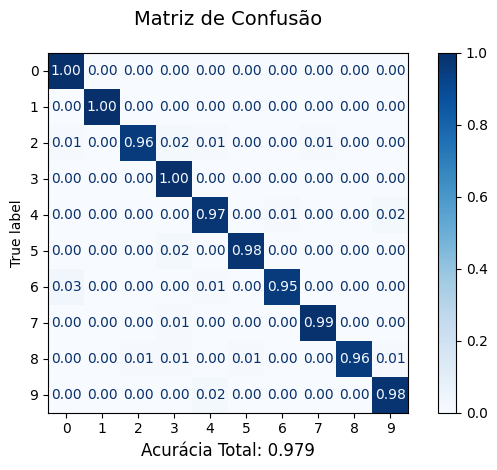


                RELATÓRIO DETALHADO POR CLASSE
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       1.00      1.00      1.00       126
           2       0.99      0.96      0.97       116
           3       0.95      1.00      0.97       107
           4       0.96      0.97      0.97       110
           5       0.99      0.98      0.98        87
           6       0.99      0.95      0.97        87
           7       0.99      0.99      0.99        99
           8       1.00      0.96      0.98        89
           9       0.97      0.98      0.97        94

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

0.979 0.979 0.979 0.979


In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,  recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

y_true = todas_labels.numpy()
y_pred = todas_predicoes.numpy()


np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f',
)
disp.ax_.set_title("Matriz de Confusão", fontsize=14, pad=20)

# Acurácia no título
accuracy = accuracy_score(y_true, y_pred)
disp.ax_.set_xlabel(f'Acurácia Total: {accuracy:.3f}', fontsize=12)

plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()


recall = recall_score(y_true, y_pred, average='micro')
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='micro')
f1 = f1_score(y_true, y_pred,average='micro')


print("\n" + "="*60)
print("                RELATÓRIO DETALHADO POR CLASSE")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_names))
print(recall,accuracy,precision,f1)
